🐱 Cat Sound Classification using Deep Learning & CNNs

This notebook demonstrates a modern approach to cat sound classification by treating audio analysis as a computer vision problem. We transform audio signals into visual representations (spectrograms) and use a deep learning model to classify them based on different cat behaviors (e.g., Purring, Meowing, Hissing).

This project covers the following key stages:

📌 Objectives

    Preprocess cat audio recordings to ensure high-quality and consistent inputs.

    Convert audio signals into informative spectrogram images that serve as the model's features.

    Augment the image dataset to create a more robust and generalized model.

    Train a Convolutional Neural Network (CNN) to learn and classify the visual patterns in the spectrograms.

    Evaluate the model's performance using a key classification metric.

🛠️ Techniques Used

🔉 Audio Preprocessing

Before visual transformation, the raw audio is cleaned and standardized:

    Trimming: Removing silent portions from the start and end of recordings.

    Normalization: Scaling audio amplitude to a consistent range.

    Resampling: Standardizing the sampling rate across all audio files (e.g., 22.05kHz).

🖼️ From Sound to Image: Spectrogram Generation

Instead of extracting traditional features, we convert each audio clip into a Mel Spectrogram.

    Mel Spectrogram: A spectrogram is a visual "fingerprint" of a sound, showing how its frequency content evolves over time. The Mel scale is used because it better represents human (and likely animal) perception of pitch, making it highly effective for sound classification tasks. This allows us to use powerful image recognition models.

✨ Data Augmentation

To prevent overfitting and improve the model's ability to generalize, we artificially expand our dataset of spectrogram images using techniques like:

    Frequency Masking: Randomly masking a range of frequency channels.

    Time Masking: Randomly masking a range of time steps.

    Adding Noise: Introducing slight random noise to the audio before creating the spectrogram.

🧠 Model

We use a Convolutional Neural Network (CNN), a state-of-the-art deep learning model for image analysis.

The CNN processes the spectrogram images directly, automatically learning hierarchical features—from simple edges and textures to complex patterns—that uniquely identify each type of cat vocalization (e.g., the rhythmic, low-frequency bands of a purr versus the sharp, wide-band shape of a hiss).

📈 Evaluation

The final CNN model's performance is evaluated using:

    Accuracy: To measure the overall percentage of correctly classified sounds.

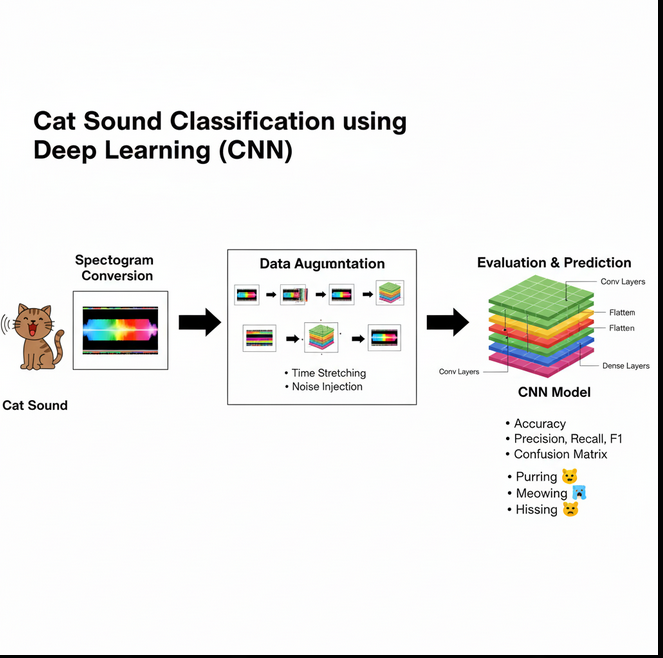

# **import libraries**

In [2]:
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

# **Split Data**

In [14]:
import os
import shutil
import splitfolders

input_folder = "spec-images"

filtered_folder = "spec_dataset_filtered"

selected_classes = ["Sad", "Happy", "Stressed", "Angry", "Resting"]


os.makedirs(filtered_folder, exist_ok=True)


for cls in selected_classes:
    src = os.path.join(input_folder, cls)
    dst = os.path.join(filtered_folder, cls)
    if os.path.exists(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        print(f"Warning: Source folder {src} does not exist.")

output_folder = "spec_dataset_split"

splitfolders.ratio(filtered_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1))

Copying files: 2950 files [00:41, 71.76 files/s]


In [6]:
train_dir = r'C:\Users\user\OneDrive\Desktop\cat\NAYA_DATA_AUG1X\spec_dataset_split\train'
val_dir = r'C:\Users\user\OneDrive\Desktop\cat\NAYA_DATA_AUG1X\spec_dataset_split\val'
test_dir = r'C:\Users\user\OneDrive\Desktop\cat\NAYA_DATA_AUG1X\spec_dataset_split\test'

# **Agumentation**

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

# **Generators**

In [7]:
train_ds=train_datagen.flow_from_directory(
    train_dir,
     target_size=(232, 231),
    batch_size=32,
    class_mode="categorical",
    seed=42,
    shuffle=True
)
val_ds=val_datagen.flow_from_directory(
    val_dir,
    target_size=(232, 231),
    batch_size=32,
    class_mode="categorical",
    seed=42,
    shuffle=False
)
test_ds=test_datagen.flow_from_directory(
    test_dir,
    target_size=(232, 231),
    batch_size=32,
    class_mode="categorical",
    seed=42,
    shuffle=False
)


Found 2063 images belonging to 5 classes.
Found 588 images belonging to 5 classes.
Found 299 images belonging to 5 classes.


# **CNN**

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(232, 231, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 232, 231, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 232, 231, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 232, 231, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 232, 231, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 116, 115, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 116, 115, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 116, 115, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 116, 115, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 116, 115, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 116, 115, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 58, 57, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 58, 57, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 58, 57, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 58, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 58, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 29, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 103936)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    53,215,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 53,509,157 (204.12 MB)

 Trainable params: 53,507,237 (204.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

# **Traing model**

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=8,
    verbose=1
)
checkpoint= ModelCheckpoint(
    "models/model_epoch_{epoch:02d}_valLoss_{val_loss:.4f}_valAcc_{val_accuracy:.4f}.h5",
    monitor='val_loss',
    save_best_only=False,
    verbose=1
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5394 - loss: 1.4759
Epoch 1: val_loss improved from None to 7.60974, saving model to best_model.h5


65/65 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.5962 - loss: 1.2359 - val_accuracy: 0.2007 - val_loss: 7.6097 - learning_rate: 0.0010
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6887 - loss: 0.9102
Epoch 2: val_loss improved from 7.60974 to 3.38412, saving model to best_model.h5


65/65 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6956 - loss: 0.8577 - val_accuracy: 0.1973 - val_loss: 3.3841 - learning_rate: 0.0010
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7496 - loss: 0.7228
Epoch 3: val_loss did not improve from 3.38412
65/65 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7329 - loss: 0.7353 - val_accuracy: 0.2024 - val_loss: 4.5072 - learning_rate: 0.0010
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7498 - loss: 0.6687
Epoch 4: val_loss did not improve from 3.38412
65/65 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7489 - loss: 0.6543 - val_accuracy: 0.1973 - val_loss: 7.7823 - learning_rate: 0.0010
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7389 - loss: 0.7121
Epoch 5: val_loss did not improve from 3.38412
65/65 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.7431 - loss: 0.7042 - val_accuracy: 0.3044 - val_loss: 4.9396 - learning_rate: 0.0010
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step -

65/65 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.7353 - loss: 0.7127 - val_accuracy: 0.5187 - val_loss: 2.6943 - learning_rate: 0.0010
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7521 - loss: 0.6600
Epoch 7: val_loss did not improve from 2.69429
65/65 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.7610 - loss: 0.6504 - val_accuracy: 0.4473 - val_loss: 3.4888 - learning_rate: 0.0010
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7822 - loss: 0.5554
Epoch 8: val_loss improved from 2.69429 to 0.84654, saving model to best_model.h5


65/65 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.7838 - loss: 0.5507 - val_accuracy: 0.6514 - val_loss: 0.8465 - learning_rate: 0.0010
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8034 - loss: 0.4949
Epoch 9: val_loss improved from 0.84654 to 0.56724, saving model to best_model.h5


65/65 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8134 - loss: 0.4551 - val_accuracy: 0.7976 - val_loss: 0.5672 - learning_rate: 0.0010
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8271 - loss: 0.4505
Epoch 10: val_loss did not improve from 0.56724
65/65 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8197 - loss: 0.4607 - val_accuracy: 0.5204 - val_loss: 2.8447 - learning_rate: 0.0010
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8116 - loss: 0.4450
Epoch 11: val_loss did not improve from 0.56724
65/65 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8100 - loss: 0.4604 - val_accuracy: 0.7636 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8302 - loss: 0.4095
Epoch 12: val_loss improved from 0.56724 to 0.49581, saving model to best_model.h5


65/65 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8260 - loss: 0.4213 - val_accuracy: 0.8061 - val_loss: 0.4958 - learning_rate: 0.0010
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.8331 - loss: 0.4030 
Epoch 13: val_loss did not improve from 0.49581
65/65 ━━━━━━━━━━━━━━━━━━━━ 1929s 30s/step - accuracy: 0.8318 - loss: 0.4044 - val_accuracy: 0.6395 - val_loss: 1.1474 - learning_rate: 0.0010
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8449 - loss: 0.3960
Epoch 14: val_loss did not improve from 0.49581
65/65 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.8439 - loss: 0.3849 - val_accuracy: 0.7568 - val_loss: 0.6409 - learning_rate: 0.0010
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8401 - loss: 0.3705
Epoch 15: val_loss did not improve from 0.49581
65/65 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8386 - loss: 0.4034 - val_accuracy: 0.8027 - val_loss: 0.5000 - learning_rate: 0.0010
Epoch 16/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0

65/65 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.8556 - loss: 0.3661 - val_accuracy: 0.8265 - val_loss: 0.4680 - learning_rate: 0.0010
Epoch 18/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8695 - loss: 0.3404
Epoch 18: val_loss did not improve from 0.46801
65/65 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.8517 - loss: 0.3693 - val_accuracy: 0.8401 - val_loss: 0.4983 - learning_rate: 0.0010
Epoch 19/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8329 - loss: 0.3955
Epoch 19: val_loss did not improve from 0.46801
65/65 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.8575 - loss: 0.3535 - val_accuracy: 0.6037 - val_loss: 1.4072 - learning_rate: 0.0010
Epoch 20/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8442 - loss: 0.3869
Epoch 20: val_loss did not improve from 0.46801
65/65 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.8463 - loss: 0.3732 - val_accuracy: 0.6922 - val_loss: 1.0887 - learning_rate: 0.0010
Epoch 21/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s

65/65 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.8696 - loss: 0.3275 - val_accuracy: 0.8724 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 26/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8821 - loss: 0.2961
Epoch 26: val_loss did not improve from 0.33502
65/65 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.8812 - loss: 0.3048 - val_accuracy: 0.7160 - val_loss: 0.9633 - learning_rate: 0.0010
Epoch 27/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8711 - loss: 0.3458
Epoch 27: val_loss did not improve from 0.33502
65/65 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.8706 - loss: 0.3330 - val_accuracy: 0.6599 - val_loss: 1.6900 - learning_rate: 0.0010
Epoch 28/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8647 - loss: 0.3414
Epoch 28: val_loss did not improve from 0.33502
65/65 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.8623 - loss: 0.3332 - val_accuracy: 0.6684 - val_loss: 1.3750 - learning_rate: 0.0010
Epoch 29/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6s

KeyboardInterrupt: 

## **# Hint: If you see a "KeyboardInterrupt" error during training,**
## **it's not an actual bug. It just means you manually stopped the cell.**
## **The model and history are still available up to that point.**


# **Save Last Model**

In [12]:
from tensorflow import keras
model = keras.models.load_model(r"C:\Users\user\OneDrive\Desktop\cat\NAYA_DATA_AUG1X\last_model\last_model.h5")


# **evalute model**

In [13]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 491ms/step - accuracy: 0.9030 - loss: 0.2772
Test Accuracy: 90.30%
Test Loss: 0.2772


In [23]:
loss,acc=model.evaluate(train_ds)
print(f"Train Accuracy: {acc*100:.2f}%")
print(f"Train Loss: {loss:.4f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 508ms/step - accuracy: 0.9506 - loss: 0.1348
Train Accuracy: 95.06%
Train Loss: 0.1348


In [24]:
loss,acc=model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.8724 - loss: 0.4107
Validation Accuracy: 87.24%
Validation Loss: 0.4107
